In [1]:
import re
import nltk
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv to twitter_training.csv
Saving twitter_validation.csv to twitter_validation.csv


In [7]:
def preprocess_text(text):
    """
    Preprocesses text for sentiment analysis using Naïve Bayes.
    - Converts to lowercase
    - Removes special characters and numbers
    - Tokenizes using split()
    - Removes stopwords
    - Applies stemming

    Args:
        text (str): Raw text input
    Returns:
        str: Preprocessed text
    """
    # Check if text is a string before preprocessing; if not, convert it to an empty string.
    if not isinstance(text, str):
        text = str(text)

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize using split() instead of word_tokenize()
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Apply stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back to string
    return ' '.join(tokens)

In [4]:
def train_and_evaluate(X_train, y_train, X_test, y_test):
    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    classifier = MultinomialNB()
    classifier.fit(X_train_vec, y_train)
    y_trainpred = classifier.predict(X_train_vec)
    y_testpred = classifier.predict(X_test_vec)

    accuracy = accuracy_score(y_train, y_trainpred)
    print(f"Training Accuracy: {accuracy}")
    print(classification_report(y_train, y_trainpred))

    accuracy = accuracy_score(y_test, y_testpred)
    print(f"Testing Accuracy: {accuracy}")
    print(classification_report(y_test, y_testpred))
    return classifier, vectorizer, y_trainpred, y_testpred

In [5]:
train_data = pd.read_csv('twitter_training.csv',encoding='latin-1')
test_data = pd.read_csv('twitter_validation.csv',encoding='latin-1')

In [8]:
X_train = [preprocess_text(row['text']) for index, row in train_data.iterrows()]
y_train = [row['sentiment'] for index, row in train_data.iterrows()]
X_test = [preprocess_text(row['text']) for index, row in test_data.iterrows()]
y_test = [row['sentiment'] for index, row in test_data.iterrows()]

In [9]:
trained_model, vectorizer, y_trainpred, y_testpred = train_and_evaluate(X_train, y_train, X_test, y_test)

Training Accuracy: 0.7569963311105755
              precision    recall  f1-score   support

  Irrelevant       0.97      0.50      0.66     12990
    Negative       0.68      0.91      0.78     22542
     Neutral       0.86      0.67      0.75     18318
    Positive       0.74      0.83      0.78     20832

    accuracy                           0.76     74682
   macro avg       0.81      0.73      0.74     74682
weighted avg       0.79      0.76      0.75     74682

Testing Accuracy: 0.795
              precision    recall  f1-score   support

  Irrelevant       0.96      0.60      0.74       172
    Negative       0.68      0.94      0.79       266
     Neutral       0.93      0.69      0.79       285
    Positive       0.78      0.89      0.83       277

    accuracy                           0.80      1000
   macro avg       0.84      0.78      0.79      1000
weighted avg       0.83      0.80      0.79      1000



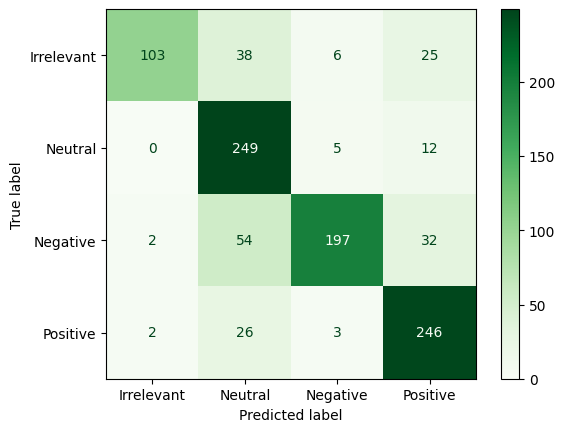

In [10]:
cm = confusion_matrix(y_test, y_testpred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Irrelevant', 'Neutral', 'Negative', 'Positive'])
disp.plot(cmap='Greens')


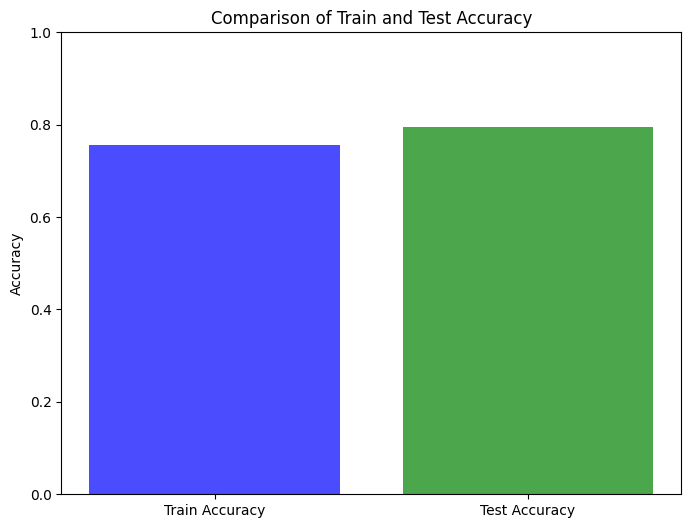

In [11]:
accuracy_data = [accuracy_score(y_train, y_trainpred), accuracy_score(y_test, y_testpred)]
labels = ['Train Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_data, color=['blue', 'green'], alpha=0.7)
plt.title('Comparison of Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy
plt.show()

In [12]:
new_review = "This is an awesome movie"
new_review_processed = preprocess_text(new_review)
new_review_vec = vectorizer.transform([new_review_processed])
prediction = trained_model.predict(new_review_vec)
print(f"Prediction for '{new_review}': {prediction[0]}")

Prediction for 'This is an awesome movie': Positive
